In [1]:
#imports
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import pandas as pd
import glob
from datetime import datetime
import copy
from matplotlib import cm
import matplotlib.dates as mdates
import json

In [2]:
tile_x = 5120
tile_y = 3584
band = 'TCI' #photo
time_period = '2019-07-20'
TCI_filename = f"./satelite_data/Phase02DataDelivery/sugarcanetiles/{tile_x}-{tile_y}-{band}-{time_period}.png"
#mask_filename = f"./satelite_data/Phase02DataDelivery/masks/mask-x{tile_x}-y{tile_y}.png"
location_path = f"./satelite_data/Phase02DataDelivery/sugarcanetiles/{tile_x}-{tile_y}-{band}*.png"
location_times = glob.glob(location_path)

for i in range(0,len(location_times)):
    location_times[i] = location_times[i][-14:-4]

location_times.sort(reverse=True)

In [59]:
def get_coord_array(tile_x, tile_y):
    JSON_filename = f"./satelite_data/Phase02DataDelivery/geometries/geo-x{tile_x}-y{tile_y}.geojson"
    #load json file
    with open(JSON_filename) as f:
        geo_dict = json.load(f)

    coord_dict = geo_dict['features'][0]['geometry']['coordinates'][0]

    TL = np.array(coord_dict[0])
    TR = np.array(coord_dict[1])
    BR = np.array(coord_dict[2])
    BL = np.array(coord_dict[3])

    print(f"Coords for {tile_x}, {tile_y}: ({Left},{Top}) to ({Right},{Bottom})")

    #map to a 512x512 table
    BR_map = np.linspace(0,1,512).reshape(512,1)
    TL_map = np.linspace(1,0,512).reshape(512,1)

    TL_ratio = TL_map.dot(TL_map.T)
    BR_ratio = BR_map.dot(BR_map.T)
    BL_ratio = BR_map.dot(TL_map.T)
    TR_ratio = TL_map.dot(BR_map.T)

    def sum_ratios(i, j):
        sum_of_rat = TL_ratio[i,j]+TR_ratio[i,j]+BR_ratio[i,j]+BL_ratio[i,j]
        assert(sum_of_rat <= 1.01)
        assert(sum_of_rat >= 0.99)

        return TL*TL_ratio[i,j] + TR*TR_ratio[i,j] + BL*BL_ratio[i,j] + BR*BR_ratio[i,j] 
    coords = np.zeros([512,512,3])
    for i in range(0,512):
        for j in range(0,512):
            vals = sum_ratios(i,j)
            coords[i,j,0] = vals[0]
            coords[i,j,1] = vals[1]

    return coords

get_coord_array(5120, 3584).shape

Coords for 5120, 3584: (148.44725599525663,-20.213777989611096) to (148.49659904172267,-20.259534818362447)


(512, 512, 3)

In [54]:
print(f"TL:{TL}, TR:{TR}, BR:{BR}, BL:{BL}")
coord_dict

TL:[148.447256   -20.21377799], TR:[148.49615427 -20.21336894], BR:[148.49659904 -20.25953482], BL:[148.44768622 -20.25994469]


[[148.44725599525663, -20.213777989611096],
 [148.49615427466193, -20.21336893727602],
 [148.49659904172267, -20.259534818362447],
 [148.44768621780295, -20.25994469403991],
 [148.44725599525663, -20.213777989611096]]

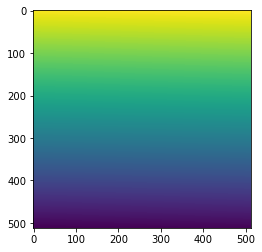

In [56]:
plt.imshow(coords[:,:,1])

In [13]:
coords[0,0]

array([0., 0.])

In [37]:
coords[511,511]

array([148.49659904, -20.25953482])